## Importing Libraries

In [1]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.metrics import classification_report
import sklearn
from sklearn.model_selection import GridSearchCV
import matplotlib.pyplot as plt
import joblib
import seaborn as sns
import pickle

## Loading the pre-processed data

In [2]:
data = pd.read_csv("pre_processed_data.csv")

In [3]:
flairs = ["Non-Political", "Scheduled", "AskIndia", "Science/Technology", "Politics",
          "Business/Finance", "Policy/Economy", "Sports", "Food"]

## Creating a column for combined text of Title, Body and Comments

In [4]:
all_data = data["title"].fillna('') + data["body"].fillna('') + data["comments"].fillna('')
data = data.assign(all_data = all_data)
data.head()

,flair,title,url,comms_num,body,author,comments,all_data
0,Non-Political,indian state ut renamed country similar popula...,https://i.redd.it/hk9o11b8dun41.png,20,NaN,schadenfeuder,nice name uttar pradesh ajay bisht gonna happy...,indian state ut renamed country similar popula...
1,Non-Political,hotstar finally uploads sunday last week tonig...,https://www.hotstar.com/in/tv/last-week-tonigh...,12,NaN,TimeVendor,first turning internet entire state refusing b...,hotstar finally uploads sunday last week tonig...
2,Non-Political,icse isc exam postponed due covid19 nonpolitical,https://cisce.org//UploadedFiles/PDF/COVID%201...,0,NaN,DSMalhotra,NaN,icse isc exam postponed due covid19 nonpolitical
3,Non-Political,nonpolitical friend wrote first book week givi...,https://www.reddit.com/r/india/comments/ezqw6i...,0,friend mine wrote first book music men volume ...,bitswreck,NaN,nonpolitical friend wrote first book week givi...
4,Non-Political,nonpolitical wild karnataka david attenborough...,https://youtu.be/gHSVLd4Ao60,1,NaN,sec2aux89,real david attenborough voice video,nonpolitical wild karnataka david attenborough...


## Linear Support Vector Machine Model

In [12]:
def lsvm(X_train, X_test, y_train, y_test):
    
    from sklearn.model_selection import GridSearchCV
    from sklearn.linear_model import SGDClassifier

    lsvm = Pipeline([('vect', CountVectorizer()),
                       ('tfidf', TfidfTransformer()),
                       ('clf', SGDClassifier()),
                        ])
    
    lsvm.fit(X_train, y_train)

    y_pred = lsvm.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairs))

def train_test_lsvm(X,y):
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
    print("Results of Linear SVM")
    lsvm(X_train, X_test, y_train, y_test)
    
train_test_lsvm(data.all_data, data.flair)  

Results of Linear SVM
accuracy 0.7242206235011991
                    precision    recall  f1-score   support

     Non-Political       0.65      0.59      0.62        44
         Scheduled       0.69      0.78      0.73        40
          AskIndia       0.76      0.80      0.78        46
Science/Technology       0.82      0.64      0.72        44
          Politics       0.69      0.70      0.69        50
  Business/Finance       0.58      0.81      0.68        52
    Policy/Economy       0.82      0.69      0.75        58
            Sports       0.74      0.78      0.76        36
              Food       0.90      0.74      0.81        47

          accuracy                           0.72       417
         macro avg       0.74      0.73      0.73       417
      weighted avg       0.74      0.72      0.73       417



#### LSVM achieved accuracy of 72.42%, as compared to 77.16% with Top Comments.

## Logistic Regression Model

In [7]:
def logisticreg(X_train, X_test, y_train, y_test):
    from sklearn.linear_model import LogisticRegression

    logreg = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', LogisticRegression(n_jobs=1, C=1e5)),
                 ])
    logreg.fit(X_train, y_train)

    y_pred = logreg.predict(X_test)

    print('accuracy %s' % accuracy_score(y_pred, y_test))
    print(classification_report(y_test, y_pred,target_names=flairs))
    
def train_test_logisticreg(X,y):
 
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)
    print("Results of Logistic Regression")
    logisticreg(X_train, X_test, y_train, y_test)
    
train_test_logisticreg(data.all_data, data.flair)   

Results of Logistic Regression


C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\hp\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:469: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


accuracy 0.7194244604316546
                    precision    recall  f1-score   support

     Non-Political       0.60      0.61      0.61        44
         Scheduled       0.68      0.75      0.71        40
          AskIndia       0.76      0.80      0.78        46
Science/Technology       0.82      0.64      0.72        44
          Politics       0.65      0.68      0.67        50
  Business/Finance       0.58      0.81      0.68        52
    Policy/Economy       0.84      0.71      0.77        58
            Sports       0.75      0.75      0.75        36
              Food       0.94      0.72      0.82        47

          accuracy                           0.72       417
         macro avg       0.74      0.72      0.72       417
      weighted avg       0.74      0.72      0.72       417



#### Logistic Regression achieved accuracy of 71.94%, as compared to 75.96% with Top Comments.

## Multinomial Naive Bayes Model

In [9]:
def mnb(X_train, X_test, y_train, y_test):
  
  from sklearn.naive_bayes import MultinomialNB

  nb = Pipeline([('vect', CountVectorizer()),
                 ('tfidf', TfidfTransformer()),
                 ('clf', MultinomialNB()),
                ])
  nb.fit(X_train, y_train)

  y_pred = nb.predict(X_test)

  print('accuracy %s' % accuracy_score(y_pred, y_test))
  print(classification_report(y_test, y_pred,target_names=flairs))

def train_test_mnb(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state = 42)

  print("Results of Naive Bayes Classifier")
  mnb(X_train, X_test, y_train, y_test)
    
train_test_mnb(data.all_data, data.flair)  

Results of Naive Bayes Classifier
accuracy 0.5782747603833865
                    precision    recall  f1-score   support

     Non-Political       0.44      0.52      0.47        33
         Scheduled       0.33      0.90      0.48        30
          AskIndia       0.59      0.73      0.66        30
Science/Technology       1.00      0.13      0.24        30
          Politics       0.80      0.48      0.60        42
  Business/Finance       0.53      0.89      0.67        37
    Policy/Economy       0.86      0.42      0.56        43
            Sports       0.91      0.67      0.77        30
              Food       0.95      0.53      0.68        38

          accuracy                           0.58       313
         macro avg       0.71      0.58      0.57       313
      weighted avg       0.72      0.58      0.57       313



#### MNB achieved accuracy of 57.82%, as compared to 61.85% with Top Comments.

## Random Forest Model

Results of Random Forest
accuracy 0.7697841726618705
                    precision    recall  f1-score   support

     Non-Political       0.68      0.68      0.68        44
         Scheduled       0.66      0.88      0.75        40
          AskIndia       0.75      0.87      0.81        46
Science/Technology       0.83      0.77      0.80        44
          Politics       0.79      0.68      0.73        50
  Business/Finance       0.72      0.85      0.78        52
    Policy/Economy       0.93      0.67      0.78        58
            Sports       0.73      0.89      0.80        36
              Food       0.92      0.70      0.80        47

          accuracy                           0.77       417
         macro avg       0.78      0.78      0.77       417
      weighted avg       0.79      0.77      0.77       417



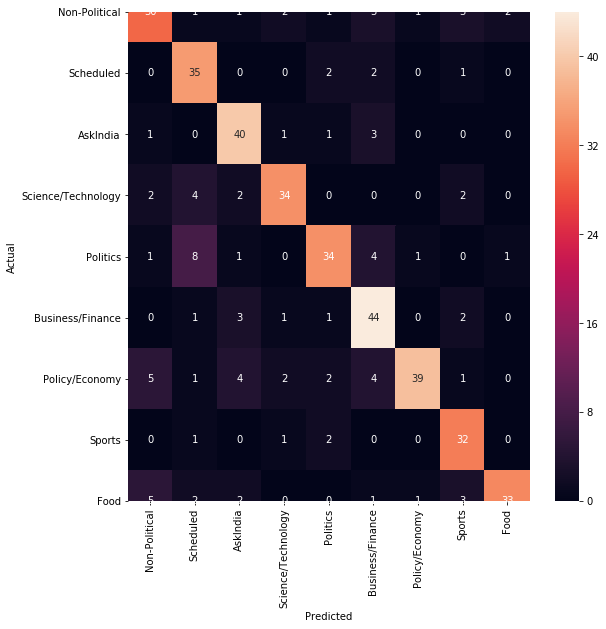

In [13]:
def randomforest(X_train, X_test, y_train, y_test):
  
  from sklearn.ensemble import RandomForestClassifier
  
  rf = Pipeline([('vect', CountVectorizer()),
                  ('tfidf', TfidfTransformer()),
                  ('clf', RandomForestClassifier(n_estimators = 1000, random_state = 42)),
                 ])
  rf.fit(X_train, y_train)

  y_pred = rf.predict(X_test)

  print('accuracy %s' % accuracy_score(y_pred, y_test))
  print(classification_report(y_test, y_pred,target_names=flairs))
    
  from sklearn.metrics import confusion_matrix
  conf_mat = confusion_matrix(y_test, y_pred)
  fig, ax = plt.subplots(figsize=(9,9))
  sns.heatmap(conf_mat, annot=True, fmt='d',
              xticklabels=flairs, yticklabels=flairs)
  plt.ylabel('Actual')
  plt.xlabel('Predicted')
  plt.show()  
    
def train_test_rf(X,y):
 
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 42)

  print("Results of Random Forest")
  randomforest(X_train, X_test, y_train, y_test)
    
train_test_rf(data.all_data, data.flair)      

#### Random Forest model has achieved accuracy of 76.97%, as compared to 79.80% with Top Comments.

#### The confusion matrix for the Random Forest model shows that the model, having been trained on data consisting of Title, Body and All Top-Level (comments which are replies to the post itself, not to other comments), is more likely to get confused in deciding between 2 or more flairs, as compared to a model trained on Title, Body and the 3 Top Comments rated for the Reddit post, as the training data tends to get diluted as more and more common top uni-grams and bi-grams emerge between flairs, hence leading to decreased accuracy.
##### Note: For the confusion matrix using top 3 comments instead of top comments, please visit the Final Model notebook.